In [1]:
cd ~/Downloads/

/Users/chowdahead/Downloads


In [2]:
import pygrib
grib = "gfsanl_3_20190410_0000_000.grb2"# Set the file name of your input GRIB file
grbs = pygrib.open(grib)

In [3]:
grbs.read()

[1:Visibility:m (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 201904100000,
 2:U component of wind:m s**-1 (instant):regular_ll:unknown:level 0:fcst time 0 hrs:from 201904100000,
 3:V component of wind:m s**-1 (instant):regular_ll:unknown:level 0:fcst time 0 hrs:from 201904100000,
 4:Ventilation Rate:m**2 s**-1 (instant):regular_ll:unknown:level 0:fcst time 0 hrs:from 201904100000,
 5:Wind speed (gust):m s**-1 (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 201904100000,
 6:Geopotential Height:gpm (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0 hrs:from 201904100000,
 7:Temperature:K (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0 hrs:from 201904100000,
 8:Relative humidity:% (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0 hrs:from 201904100000,
 9:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0 hrs:from 201904100000,
 10:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level

In [4]:
grb_500 = grbs.select()[141]
print(grb_500)

142:Geopotential Height:gpm (instant):regular_ll:isobaricInhPa:level 50000 Pa:fcst time 0 hrs:from 201904100000


In [5]:
data_500mb = grb_500.values

In [6]:
print(grb_500['dataDate'])

print(grb_500['hour'])

print(grb_500['minute'])

print(grb_500['forecastTime'])

print(grb_500['dataTime'])

file_time = str(grb_500['dataDate'])+"_"+str(grb_500['dataTime'])+"Z"
print(file_time)

20190410
0
0
0
0
20190410_0Z


In [7]:
lat,lon = grb_500.latlons()

In [8]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from metpy.plots import add_metpy_logo
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

In [9]:
cd ..

/Users/chowdahead


In [11]:
import Vorticity_Color_Bar as vort_CB
vort_cmap = vort_CB.my_cmap


In [12]:
vort_levels = vort_CB.vort_levels

In [42]:
# Set Projection of Data
datacrs = ccrs.PlateCarree()

# Set Projection of Plot
plotcrs = ccrs.LambertConformal(central_latitude=[30, 60], central_longitude=-100)

# Add Map Features
states_provinces = cfeature.NaturalEarthFeature(category='cultural',
    name='admin_1_states_provinces_lakes',scale='50m', facecolor='none')

country_borders = cfeature.NaturalEarthFeature(category='cultural',
    name='admin_0_countries',scale='50m', facecolor='none')

# Colorbar Axis Placement (under figure)
colorbar_axis = [0.219, 0.005, 0.585, 0.03] # [left, bottom, width, height]

# Lat/Lon Extents [lon0,lon1,lat0,lat1]
extent = [-130., -70, 20., 60.]

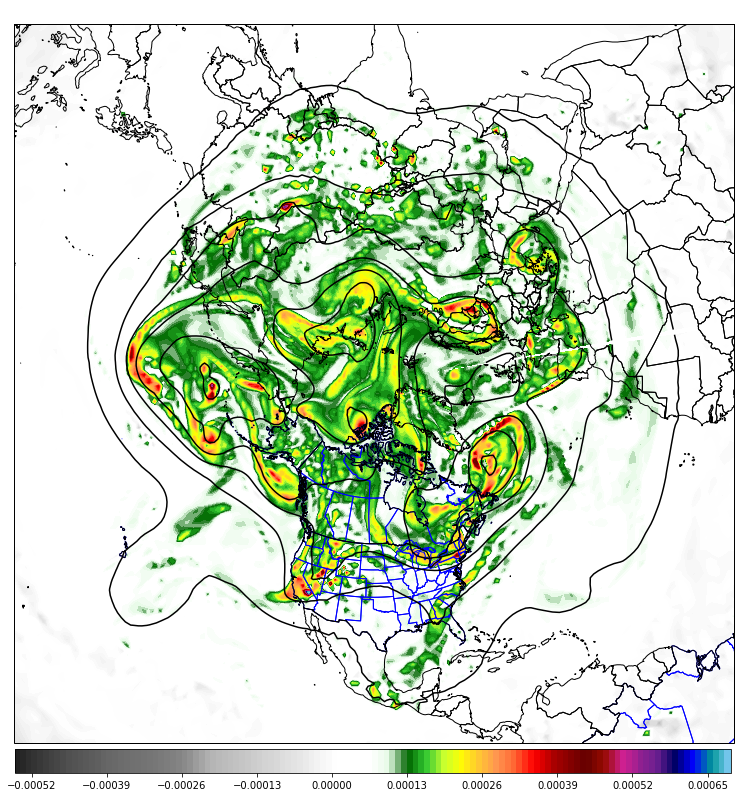

In [43]:
grb_Vort = grbs.select()[147]
data_Vort = grb_Vort.values

# Create new figure
datacrs = ccrs.PlateCarree()
plotcrs = ccrs.NorthPolarStereo(central_longitude=-100.0)

fig = plt.figure(figsize=(17., 11.))

add_metpy_logo(fig, 30, 940, size='small')
gs = gridspec.GridSpec(2, 1, height_ratios=[1, .02],
        bottom=.02, top=.95, hspace=0.01, wspace=0.01)

ax = plt.subplot(gs[0], projection=plotcrs)
# Add the map and set the extent
#ax = plt.subplot(111, projection=plotcrs)

#Set the lat and lon boundaries
#ax.set_extent(extent, datacrs)
ax.set_extent([-180, 180, 10, 90], ccrs.PlateCarree())

# Add state boundaries to plot
ax.add_feature(states_provinces, edgecolor='blue', linewidth=1)

# Add country borders to plot
ax.add_feature(country_borders, edgecolor='black', linewidth=1)

# Plot Title
plt.title(' ', fontsize=16,loc='left')

#data_Vort = np.ma.masked_where(data_Vort < -.00085,data_Vort)
#data_Vort = np.ma.masked_where(data_Vort > .0085,data_Vort)

data_500mb_lev = np.arange(4500,6000,100)

cs = ax.contour(lon, lat, data_500mb,colors='k',
                 transform=datacrs)

cs2 = ax.contourf(lon, lat, data_Vort,vort_levels,
                 transform=datacrs,cmap=vort_cmap)

cbaxes = fig.add_axes(colorbar_axis) # [left, bottom, width, height]

cbar = plt.colorbar(cs2, orientation='horizontal',cax=cbaxes)
ax.set_autoscaley_on(False)

plt.show()